# PERBANDINGAN JAM TA_meas_AVG
## Januari 2023

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu 

#Unggah File Synoptik
df = pd.read_csv('D:/BMKG/Revisi project/REVISI_PROJECT/DATA/Observsuhu.csv')
df = df.drop(df.index[-3:])
print(df)

#Unggah File AWS
dft = pd.read_csv('D:/BMKG/Revisi project/REVISI_PROJECT/HASIL DATA/DATA AWS 00-12 Januari 2023.csv')
print(dft)

   Tgl    00    01    02    03    04    05    06    07    08    09    10  \
0    1  26.2  27.4  28.6  29.2  30.5  30.8  29.4  29.8  29.0  28.6  27.4   
1    2  25.1  27.0  28.2  29.0  29.3  29.8  30.2  29.6  28.8  28.4  27.8   
2    3  25.0  26.0  27.0  28.0  29.2  29.6  29.9  30.2  29.8  28.6  27.8   
3    4  24.2  27.0  28.4  28.8  29.6  30.1  30.3  29.8  30.6  29.7  28.7   
4    5  25.2  27.4  28.0  29.2  29.8  30.8  31.3  31.2  30.8  30.4  28.6   
5    6  25.0  26.8  28.0  29.0  30.2  31.2  31.3  30.6  30.0  29.6  28.6   
6    7  26.0  27.4  29.0  29.8  30.3  30.8  30.2  30.8  29.5  28.6  28.3   
7    8  25.0  27.0  28.9  29.6  30.9  31.9  32.1  31.2  31.2  30.8  29.2   
8    9  25.2  27.0  27.8  28.2  26.4  28.2  28.8  27.5  24.6  25.5  25.8   
9   10  23.3  24.2  25.8  27.9  28.9  29.6  30.6  31.0  26.0  24.6  25.8   
10  11  25.0  26.7  28.0  29.2  29.6  30.3  30.0  29.8  25.4  23.4  23.6   
11  12  24.0  24.6  26.2  27.6  28.5  29.6  30.4  23.5  23.5  24.4  24.5   
12  13  23.8

In [3]:
#UJI T
def ujiT(synop):
  global p_two4
  sample1_bar4, sample2_bar4 = np.mean(df_sorted_4[synop]), np.mean(df_sorted1_4['tt_air_avg'])
  n14, n24 = len(df_sorted_4[synop]), len(df_sorted_4[synop])
  df_4=(n14+n24)-2
  var_sample14, var_sample24= np.var(df_sorted_4[synop], ddof=1), np.var(df_sorted1_4['tt_air_avg'], ddof=1)

  # pooled sample variance
  var4 = ( ((n14-1)*var_sample14) + ((n24-1)*var_sample24) ) / (n14+n24-2)

  # standard error
  std_error4 = np.sqrt(var4 * (1.0 / n14 + 1.0 / n24))

  # calculate t statistics
  t4 = abs(sample1_bar4- sample2_bar4) / std_error4
  print('t static:',t4)
  # two-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.975, df=df_4)
  print("Critical value for t two tailed:",t_c4)


  # one-tailed critical value at alpha = 0.05
  t_c4 = stats.t.ppf(q=0.95, df=df_4)
  print("Critical value for t one tailed:",t_c4)


  # get two-tailed p value
  p_two4= 2*(1-stats.t.cdf(x=t4, df=df_4))
  print("p-value for two tailed:",p_two4)

  # get one-tailed p value
  p_one4= 1-stats.t.cdf(x=t4, df=df_4)
  print("p-value for one tailed:",p_one4)
  if p_two4>=0.05:
    print("Tidak ada perbedaan yang signifikan antara dua kelompok data")
  else:
    print("Ada perbedaan yang signifikan dalam satu arah tertentu (lebih besar atau lebih kecil).")

In [4]:
#Uji Mann-Whitney U
def mwu(synop):
  global p_value
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)
  stat, p_value = mannwhitneyu(df_cleaned_4['tt_air_avg'], df_cleaned14[synop])
  print('Statistics=%.2f, p=%.2f' % (stat, p_value))
  # Level of significance
  alpha = 0.05
  # conclusion
  if p_value < alpha:
      print('Terdapat perbedaan yang siginifikan antara 2 sampel data')
  else:
      print('Tidak ada perbedaan yang siginifikan antara 2 sampel data')

In [5]:
#Normalisasi Data
def absolute_maximum_scale(series):
  return series / series.abs().max()

Jam 00

Indeks baris yang berisi NaN:
Index([1, 3, 5, 6, 10, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 24, 26, 27, 28], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.4473736067501809
Critical value for t two tailed: 2.0128955952945886
Critical value for t one tailed: 1.67866041259169
p-value for two tailed: 0.6567049476558466
p-value for one tailed: 0.3283524738279233
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


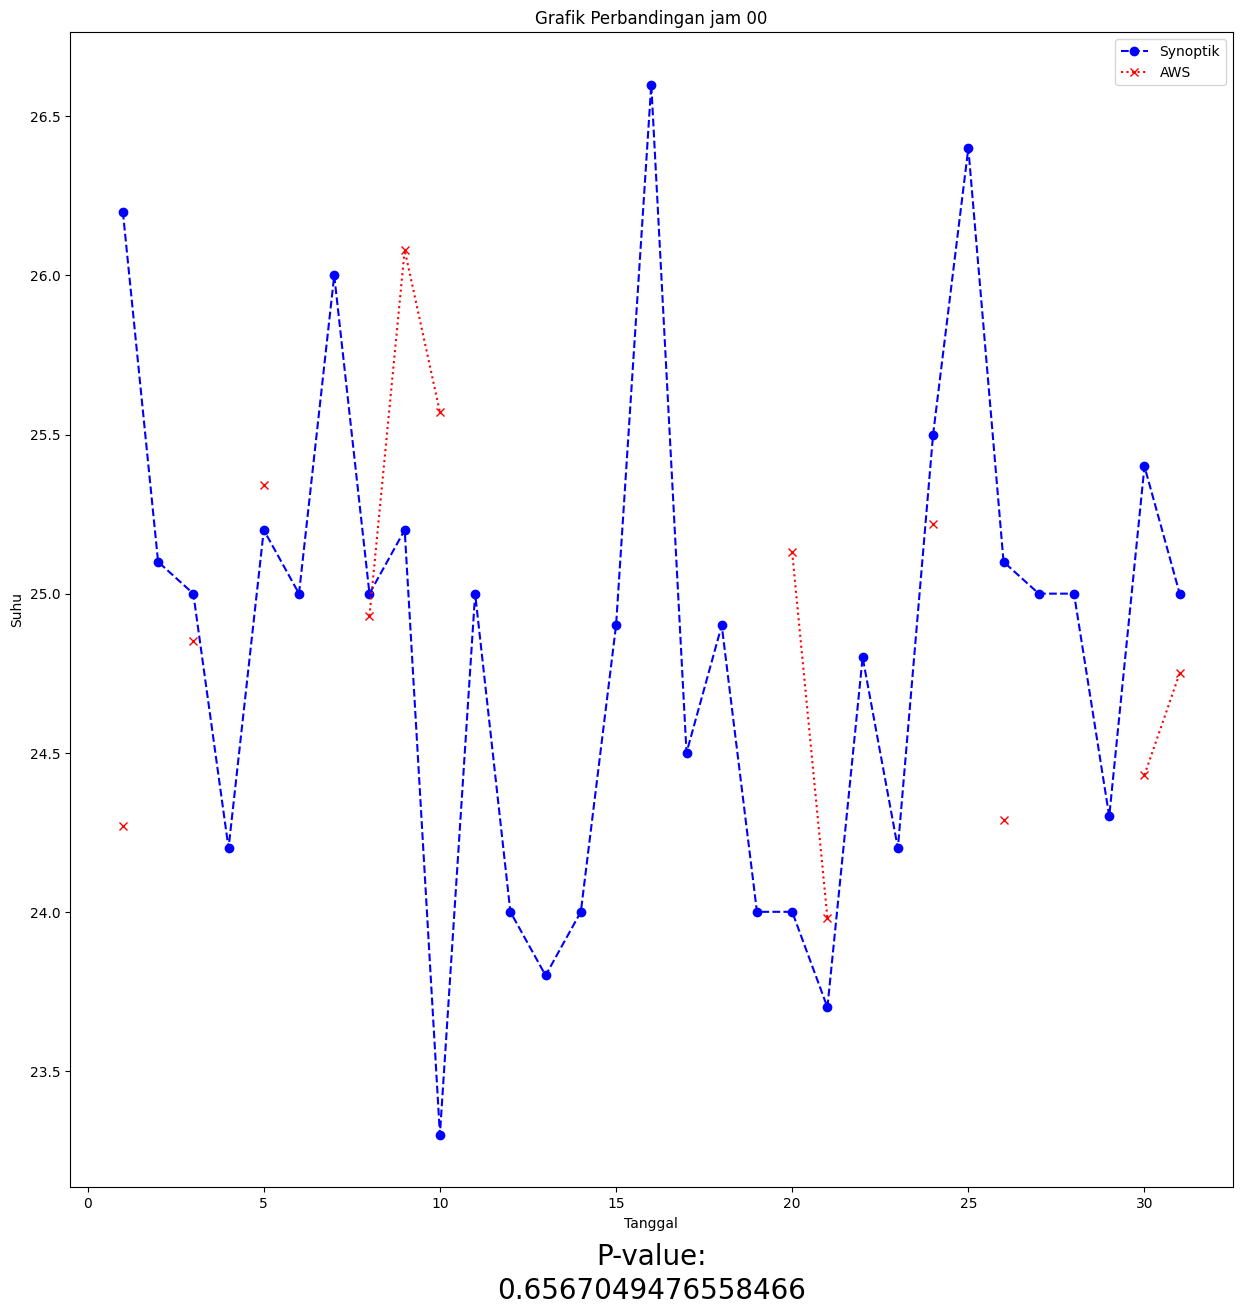

In [6]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('00:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['00']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='00', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['00'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('00')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['00']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='00', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['00'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('00')
    else:
      print("Dilakukan Uji T")
      ujiT('00')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('00')
    else:
      print("Dilakukan Uji T")
      ujiT('00')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 00')
plt.plot(df2_4['Tgl'], df2_4['00'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 1

Indeks baris yang berisi NaN:
Index([3, 4, 6, 7, 8, 9, 10, 11, 12, 17, 20, 23, 26, 27, 29], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.3938396053392412
Critical value for t two tailed: 2.0066468031022113
Critical value for t one tailed: 1.6746891532047905
p-value for two tailed: 0.16929437801425085
p-value for one tailed: 0.08464718900712542
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


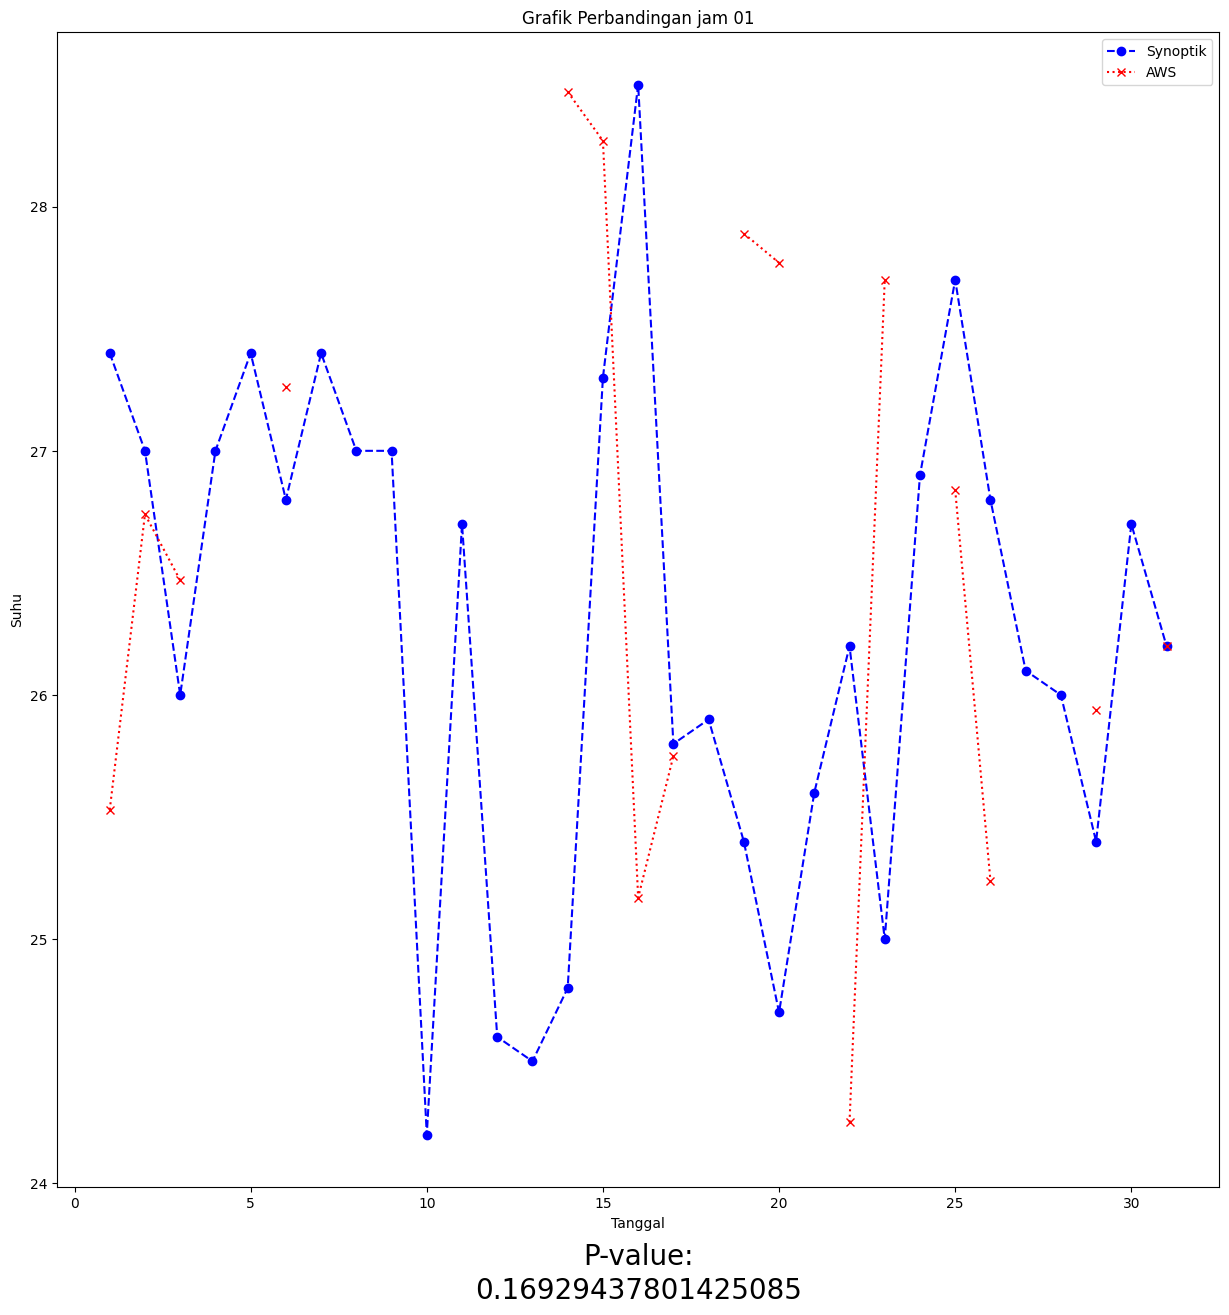

In [8]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('01:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['01']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='01', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['01'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('01')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['01']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='01', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['01'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('01')
    else:
      print("Dilakukan Uji T")
      ujiT('01')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('01')
    else:
      print("Dilakukan Uji T")
      ujiT('01')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 01')
plt.plot(df2_4['Tgl'], df2_4['01'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 2

Indeks baris yang berisi NaN:
Index([2, 4, 6, 25, 27], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data AWS tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=457.00, p=0.06
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_20772\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


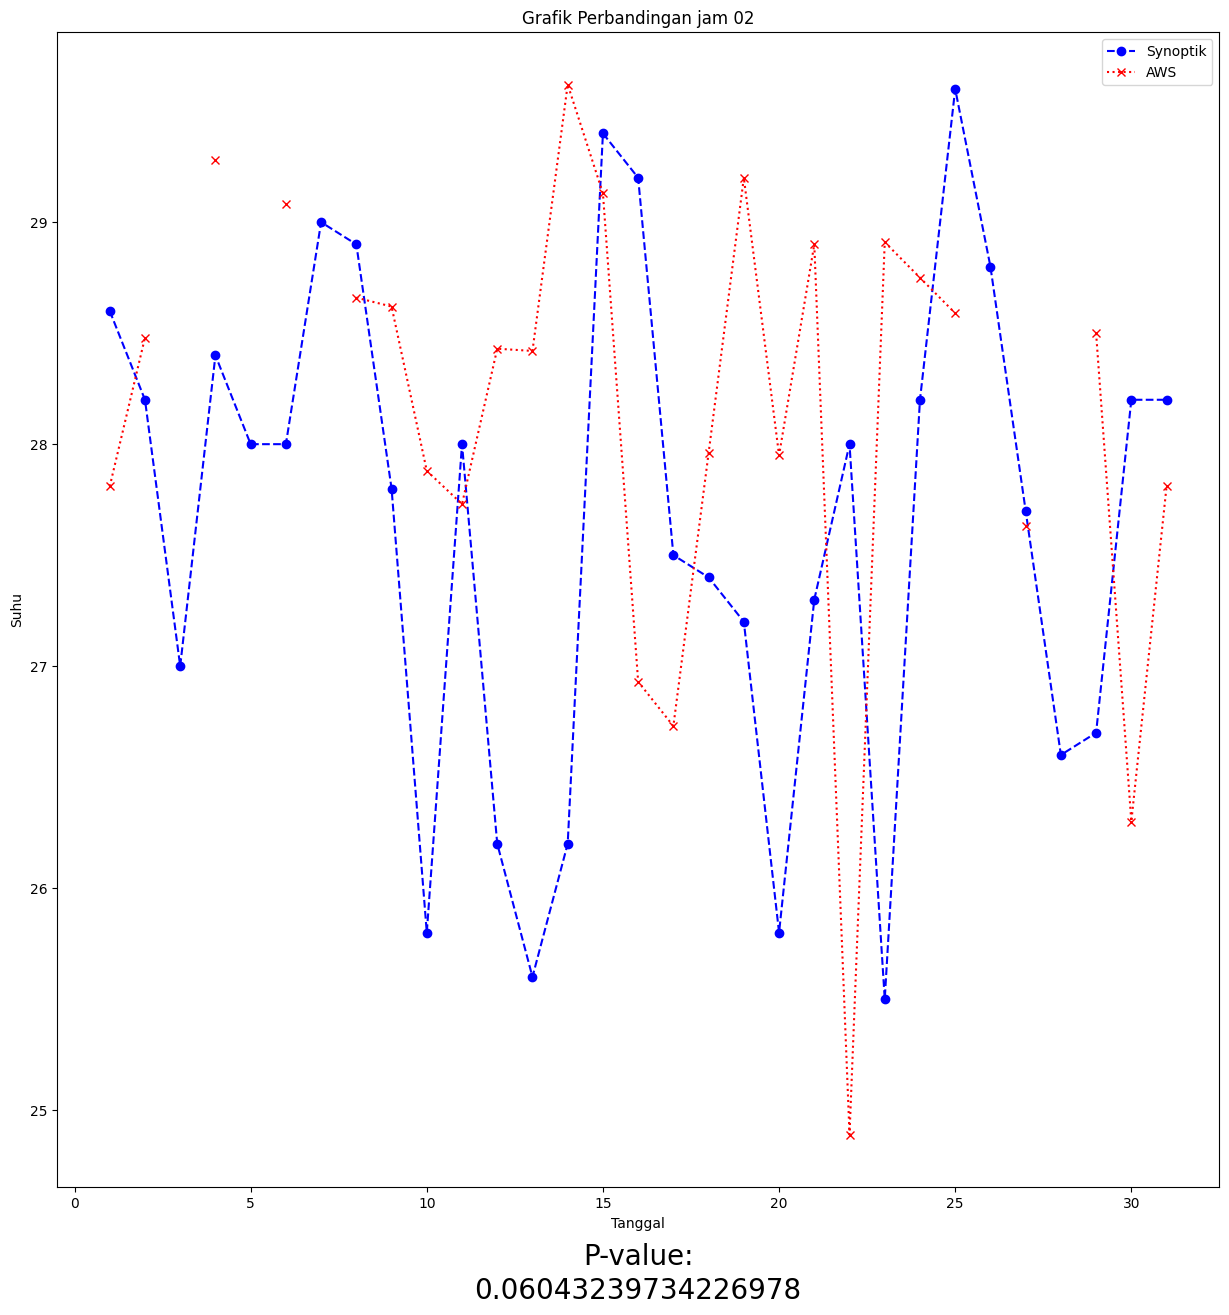

In [9]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('02:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['02']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='02', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['02'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('02')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['02']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='02', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['02'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('02')
    else:
      print("Dilakukan Uji T")
      ujiT('02')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('02')
    else:
      print("Dilakukan Uji T")
      ujiT('02')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 02')
plt.plot(df2_4['Tgl'], df2_4['02'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 3

Indeks baris yang berisi NaN:
Index([2, 4], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data AWS tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=502.00, p=0.44
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_20772\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


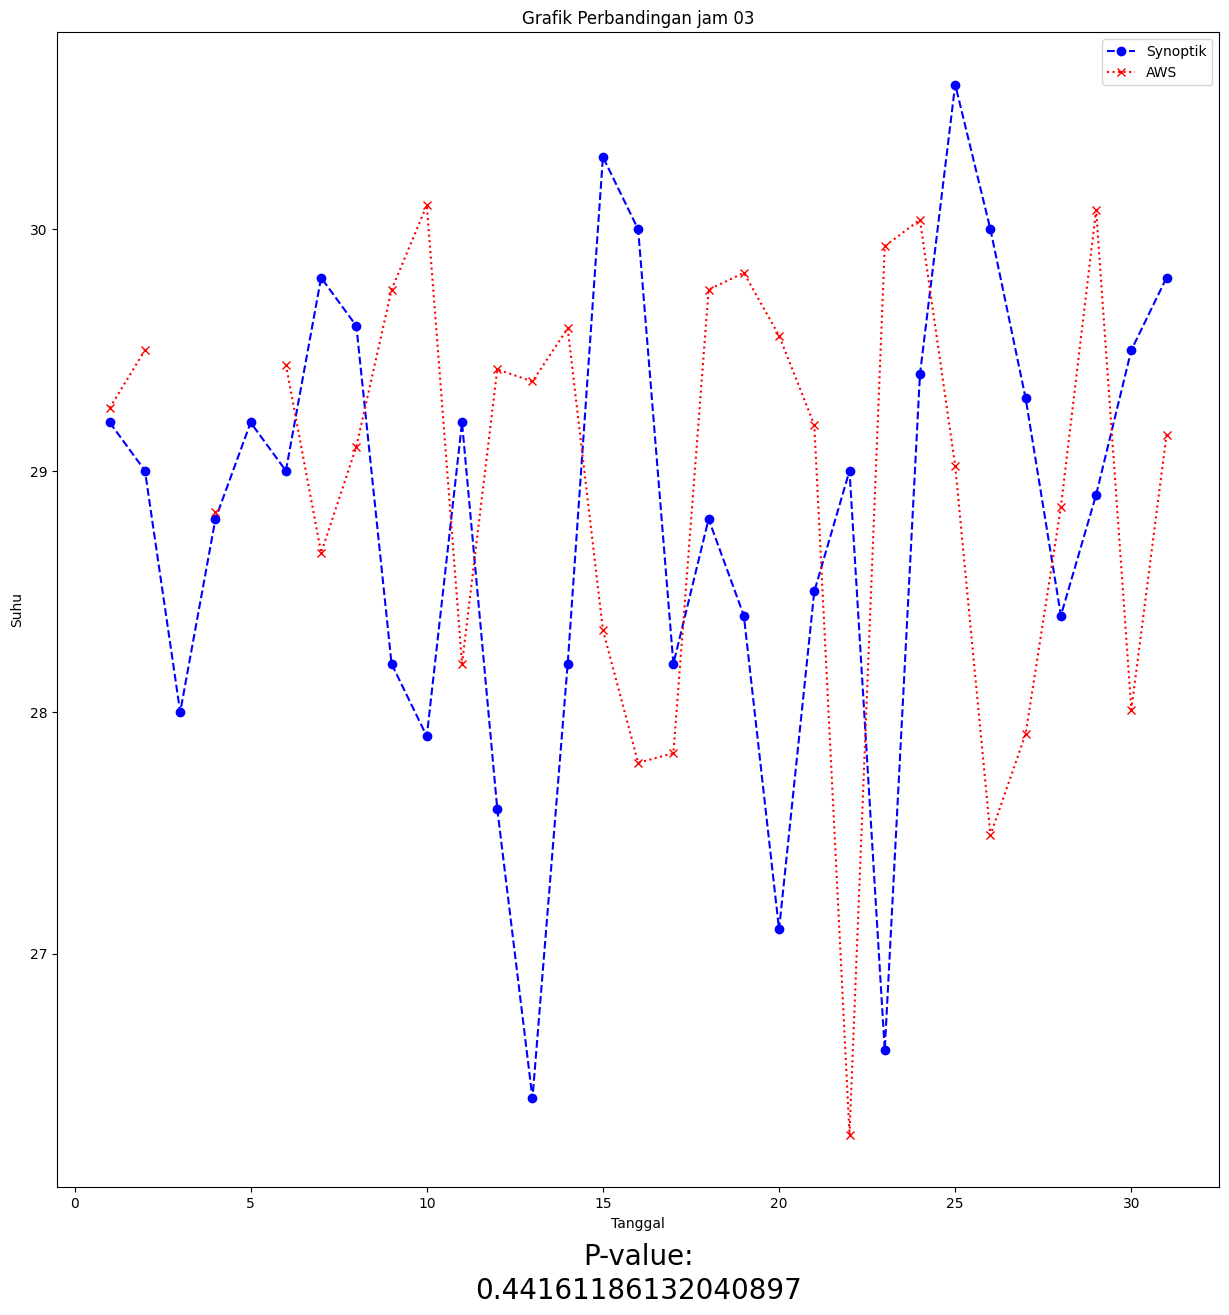

In [11]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('03:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['03']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='03', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['03'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('03')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['03']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='03', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['03'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('03')
    else:
      print("Dilakukan Uji T")
      ujiT('03')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('03')
    else:
      print("Dilakukan Uji T")
      ujiT('03')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan jam 03')
plt.plot(df2_4['Tgl'], df2_4['03'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 4

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data synoptik tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=462.00, p=0.80
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


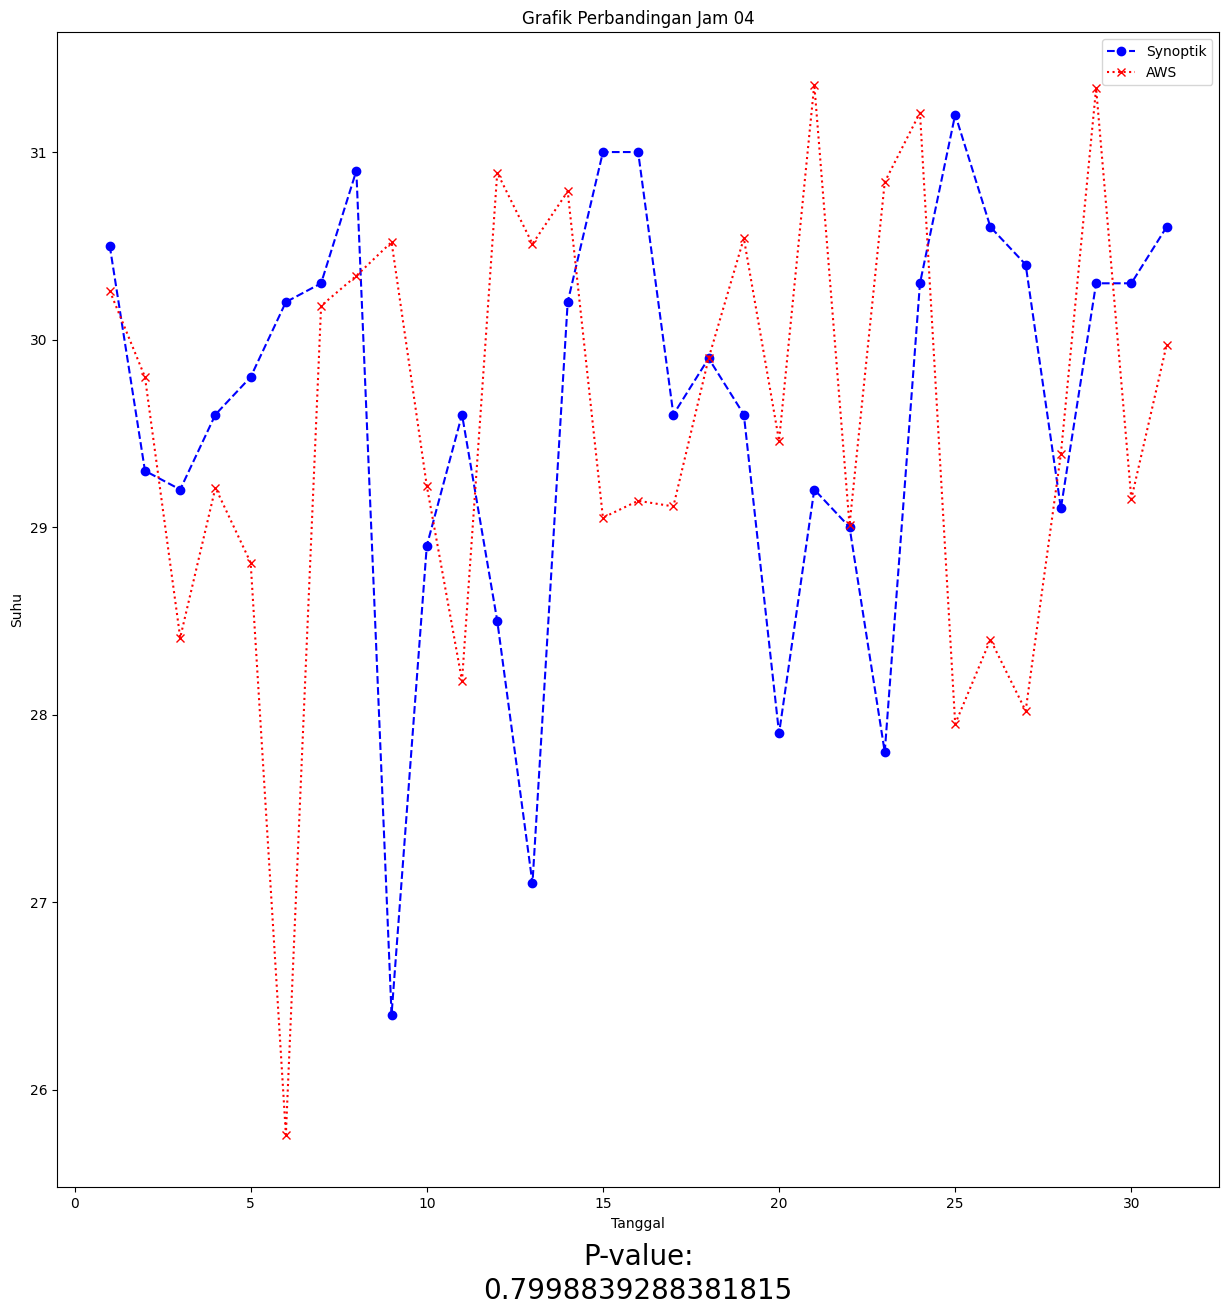

In [15]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('04:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['04']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='04', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['04'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('04')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['04']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='04', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['04'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('04')
    else:
      print("Dilakukan Uji T")
      ujiT('04')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('04')
    else:
      print("Dilakukan Uji T")
      ujiT('04')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 04')
plt.plot(df2_4['Tgl'], df2_4['04'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 5

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.8047463931083217
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.42414345425518873
p-value for one tailed: 0.21207172712759437
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


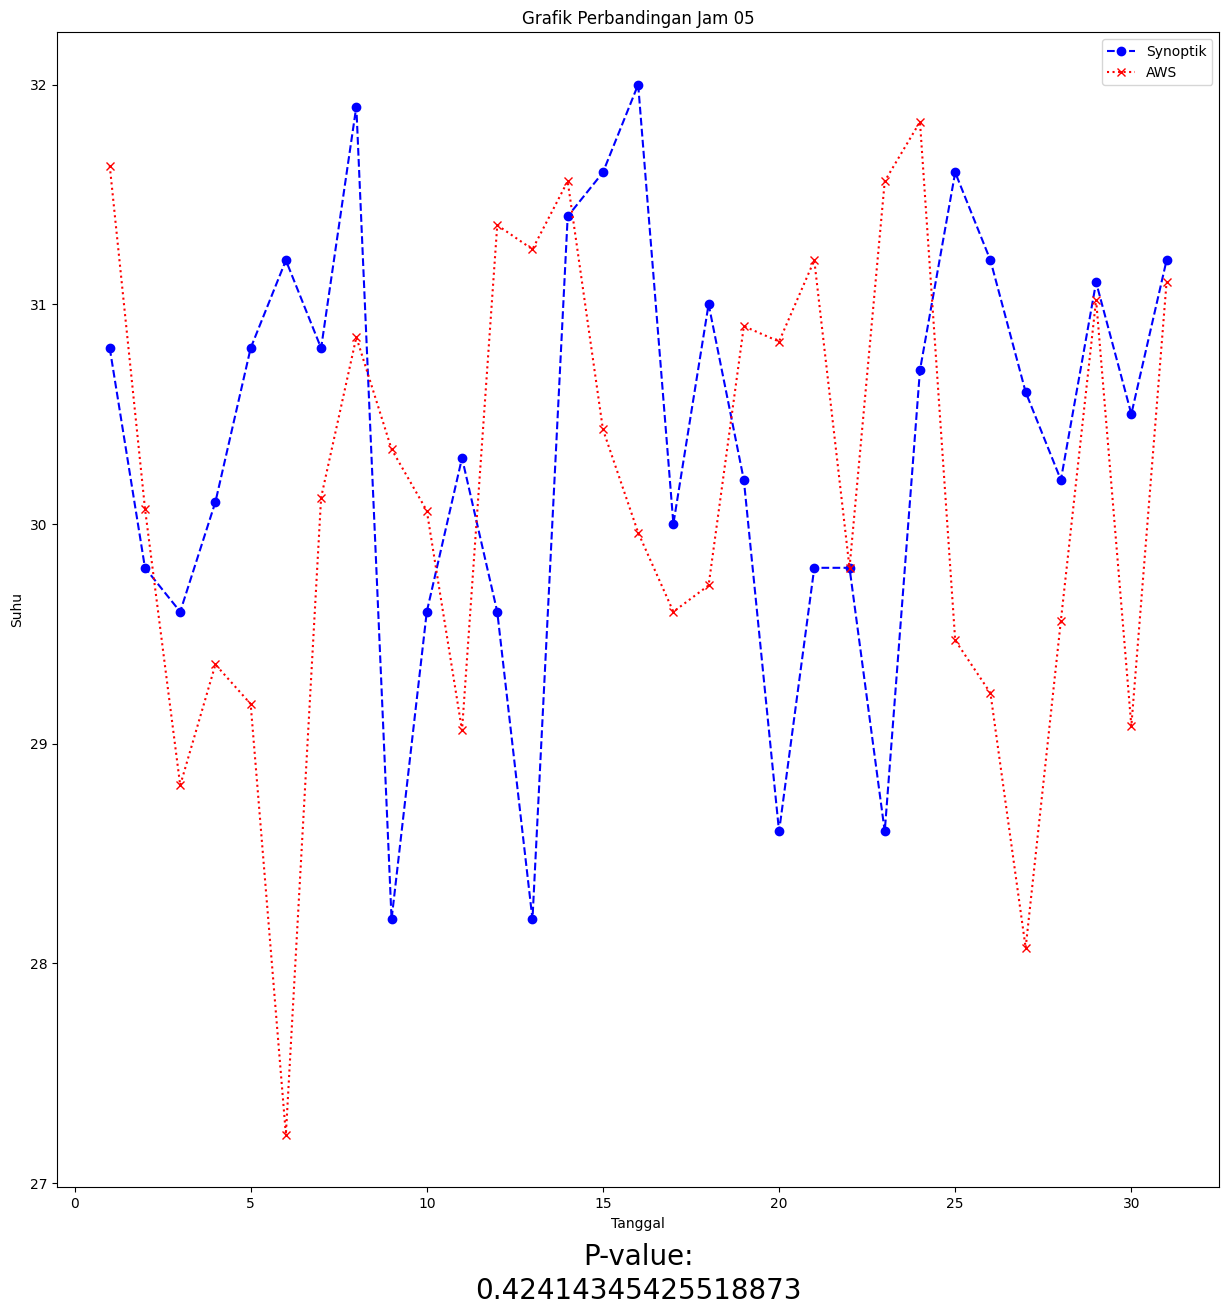

In [16]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('05:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['05']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='05', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['05'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('05')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['05']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='05', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['05'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('05')
    else:
      print("Dilakukan Uji T")
      ujiT('05')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('05')
    else:
      print("Dilakukan Uji T")
      ujiT('05')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 05')
plt.plot(df2_4['Tgl'], df2_4['05'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 6

Indeks baris yang berisi NaN:
Index([4], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 0.8122431388138965
Critical value for t two tailed: 2.0002978210582616
Critical value for t one tailed: 1.6706488646505926
p-value for two tailed: 0.4198631320125703
p-value for one tailed: 0.20993156600628515
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


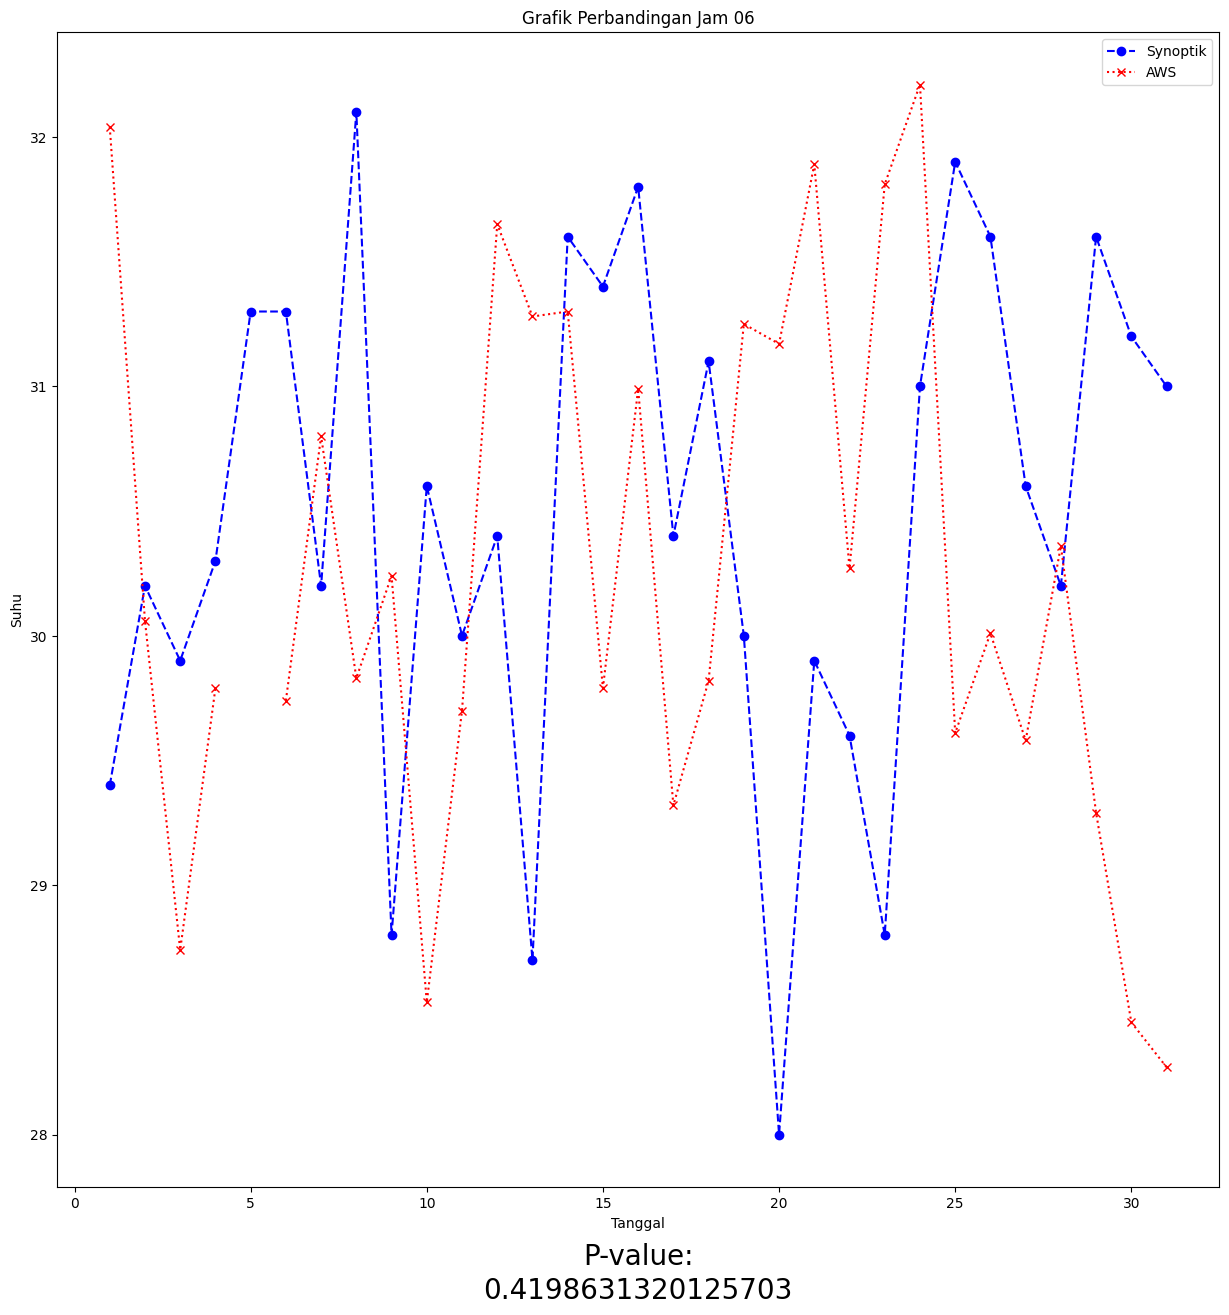

In [17]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('06:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['06']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='06', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['06'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('06')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['06']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='06', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['06'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('06')
    else:
      print("Dilakukan Uji T")
      ujiT('06')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('06')
    else:
      print("Dilakukan Uji T")
      ujiT('06')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 06')
plt.plot(df2_4['Tgl'], df2_4['06'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 7

Indeks baris yang berisi NaN:
Index([], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data synoptik tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=421.50, p=0.41
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


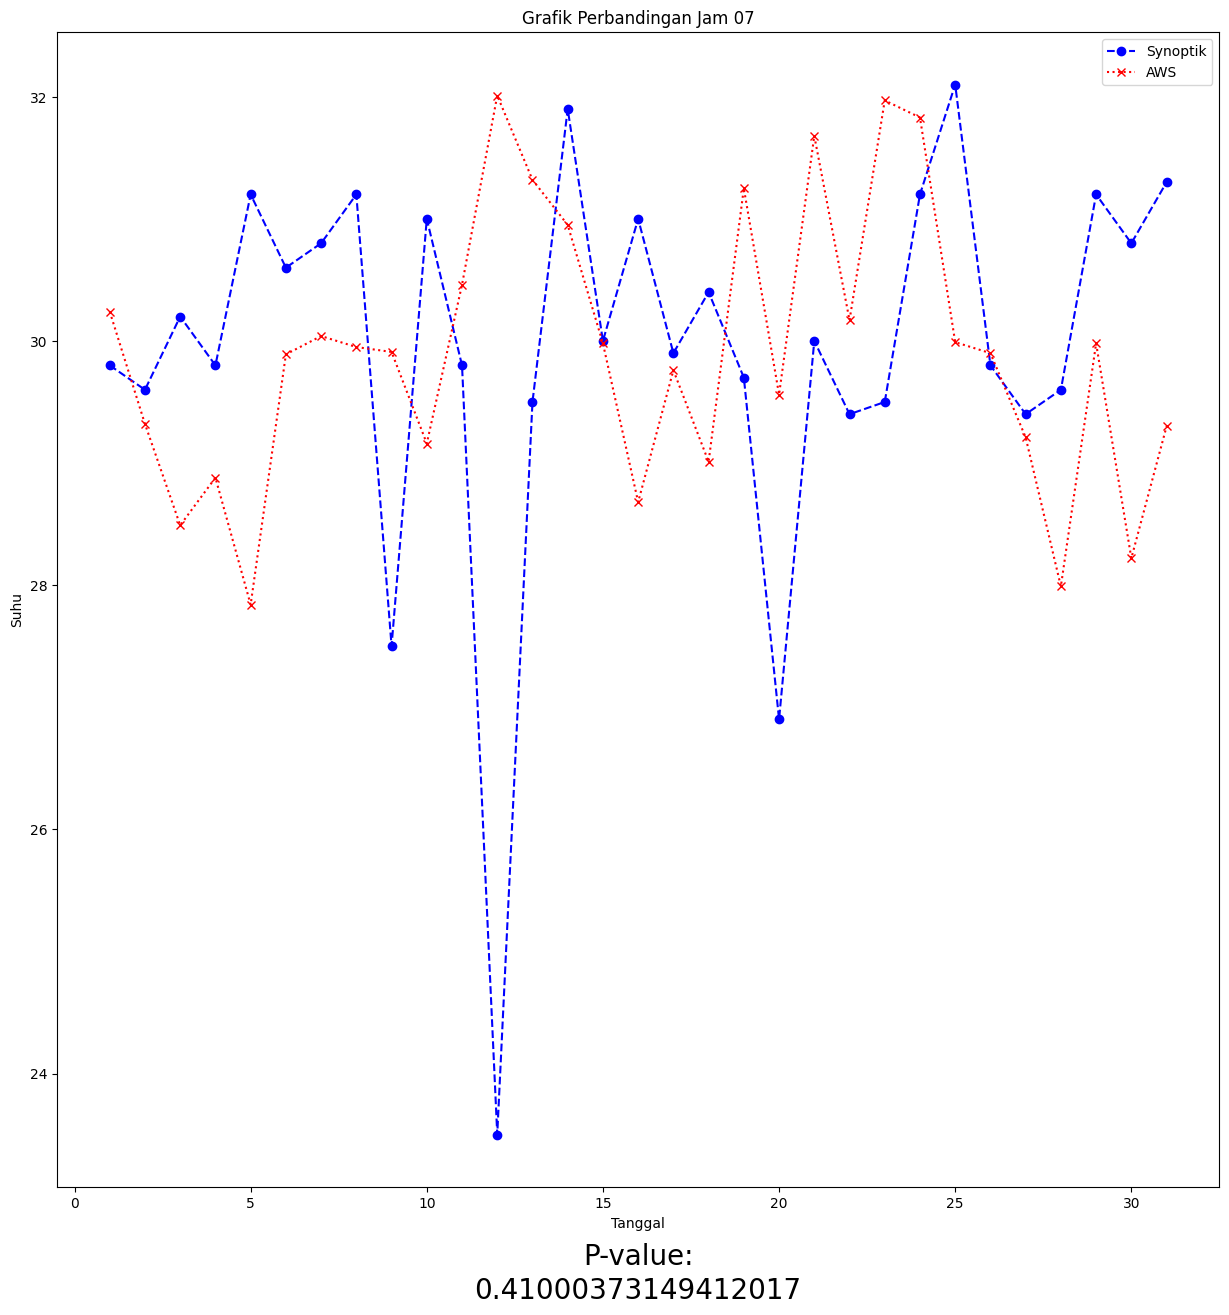

In [18]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('07:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['07']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='07', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['07'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('07')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['07']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='07', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['07'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('07')
    else:
      print("Dilakukan Uji T")
      ujiT('07')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['TA_meas_Avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('07')
    else:
      print("Dilakukan Uji T")
      ujiT('07')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 07')
plt.plot(df2_4['Tgl'], df2_4['07'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 8

Indeks baris yang berisi NaN:
Index([11, 30], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data synoptik tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=498.00, p=0.48
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_20772\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


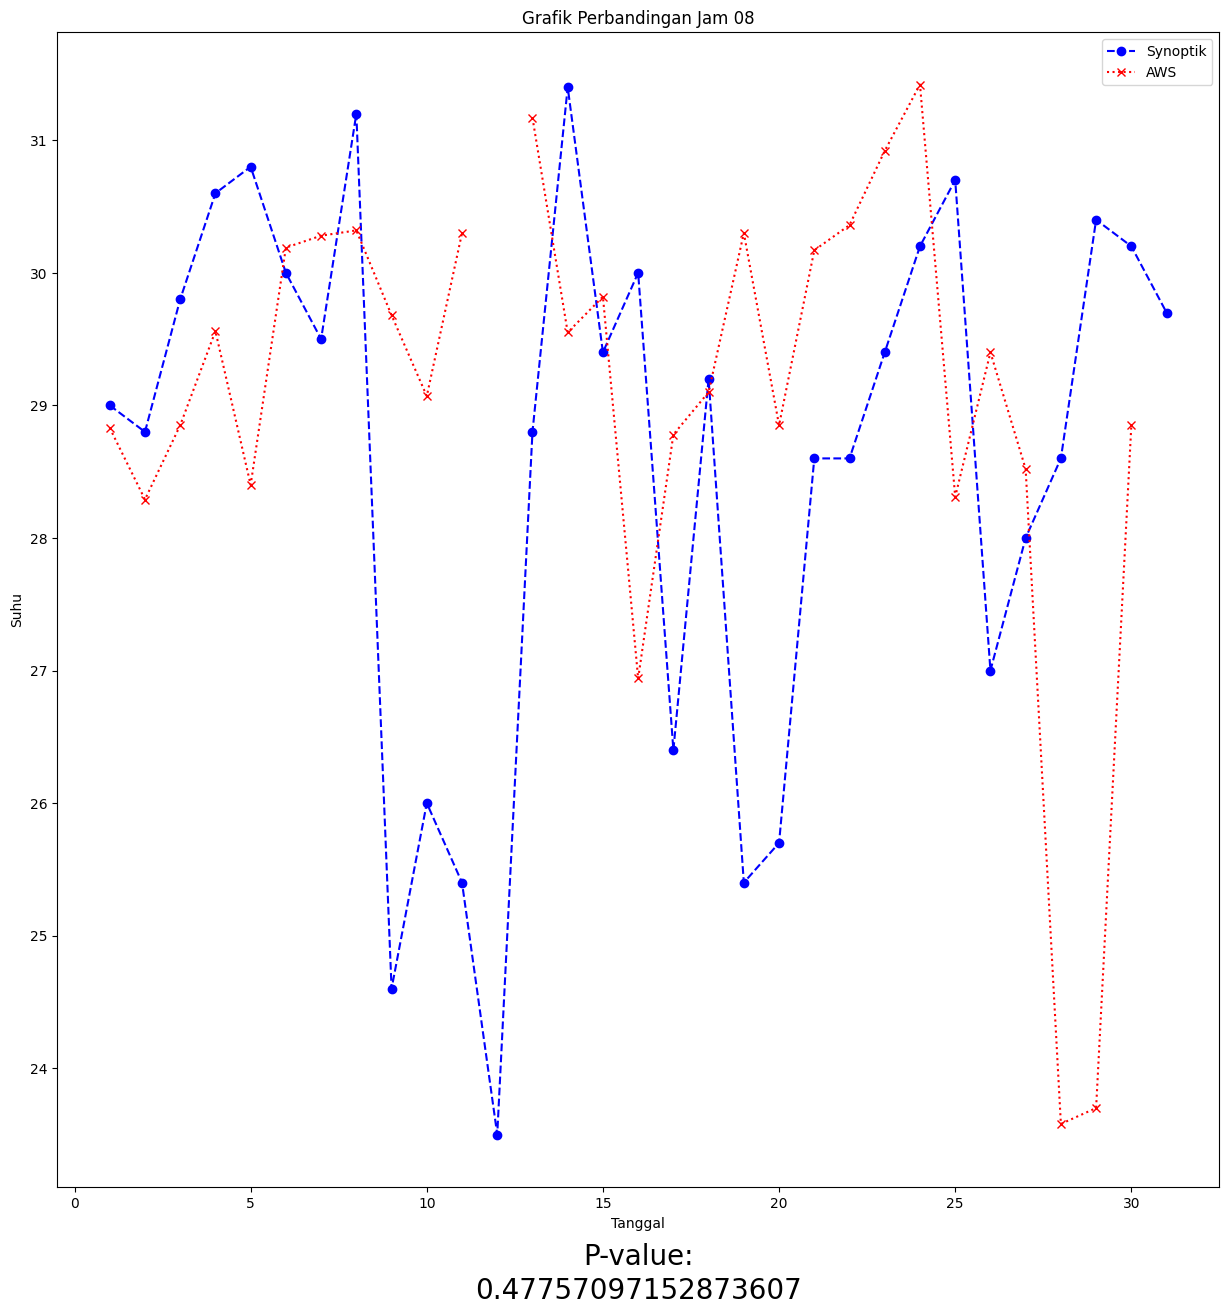

In [20]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('08:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['08']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='08', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['08'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('08')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['08']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='08', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['08'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('08')
    else:
      print("Dilakukan Uji T")
      ujiT('08')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('08')
    else:
      print("Dilakukan Uji T")
      ujiT('08')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 08')
plt.plot(df2_4['Tgl'], df2_4['08'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 9

Indeks baris yang berisi NaN:
Index([4, 11, 15, 19, 24, 26, 27], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data AWS tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=441.00, p=0.24
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_20772\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


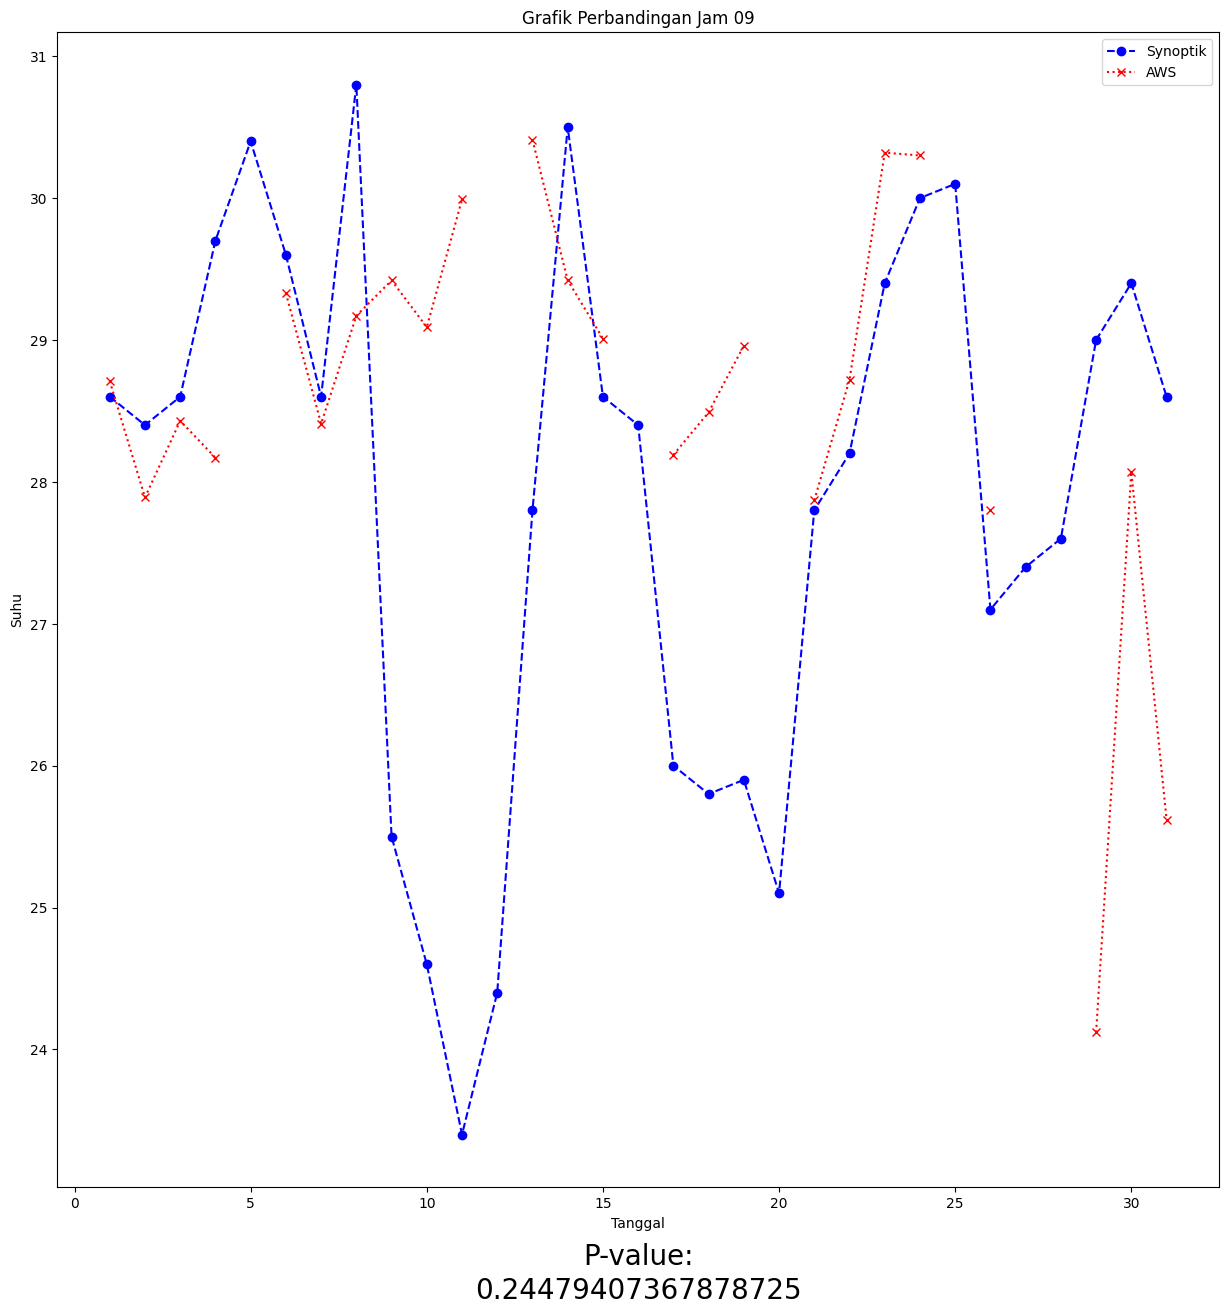

In [21]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('09:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['09']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='09', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['09'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('09')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['09']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='09', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['09'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('09')
    else:
      print("Dilakukan Uji T")
      ujiT('09')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('09')
    else:
      print("Dilakukan Uji T")
      ujiT('09')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 09')
plt.plot(df2_4['Tgl'], df2_4['09'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 10

Indeks baris yang berisi NaN:
Index([0, 9, 11, 15, 16, 17, 20, 25, 26], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data synoptik tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=329.00, p=0.69
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_20772\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


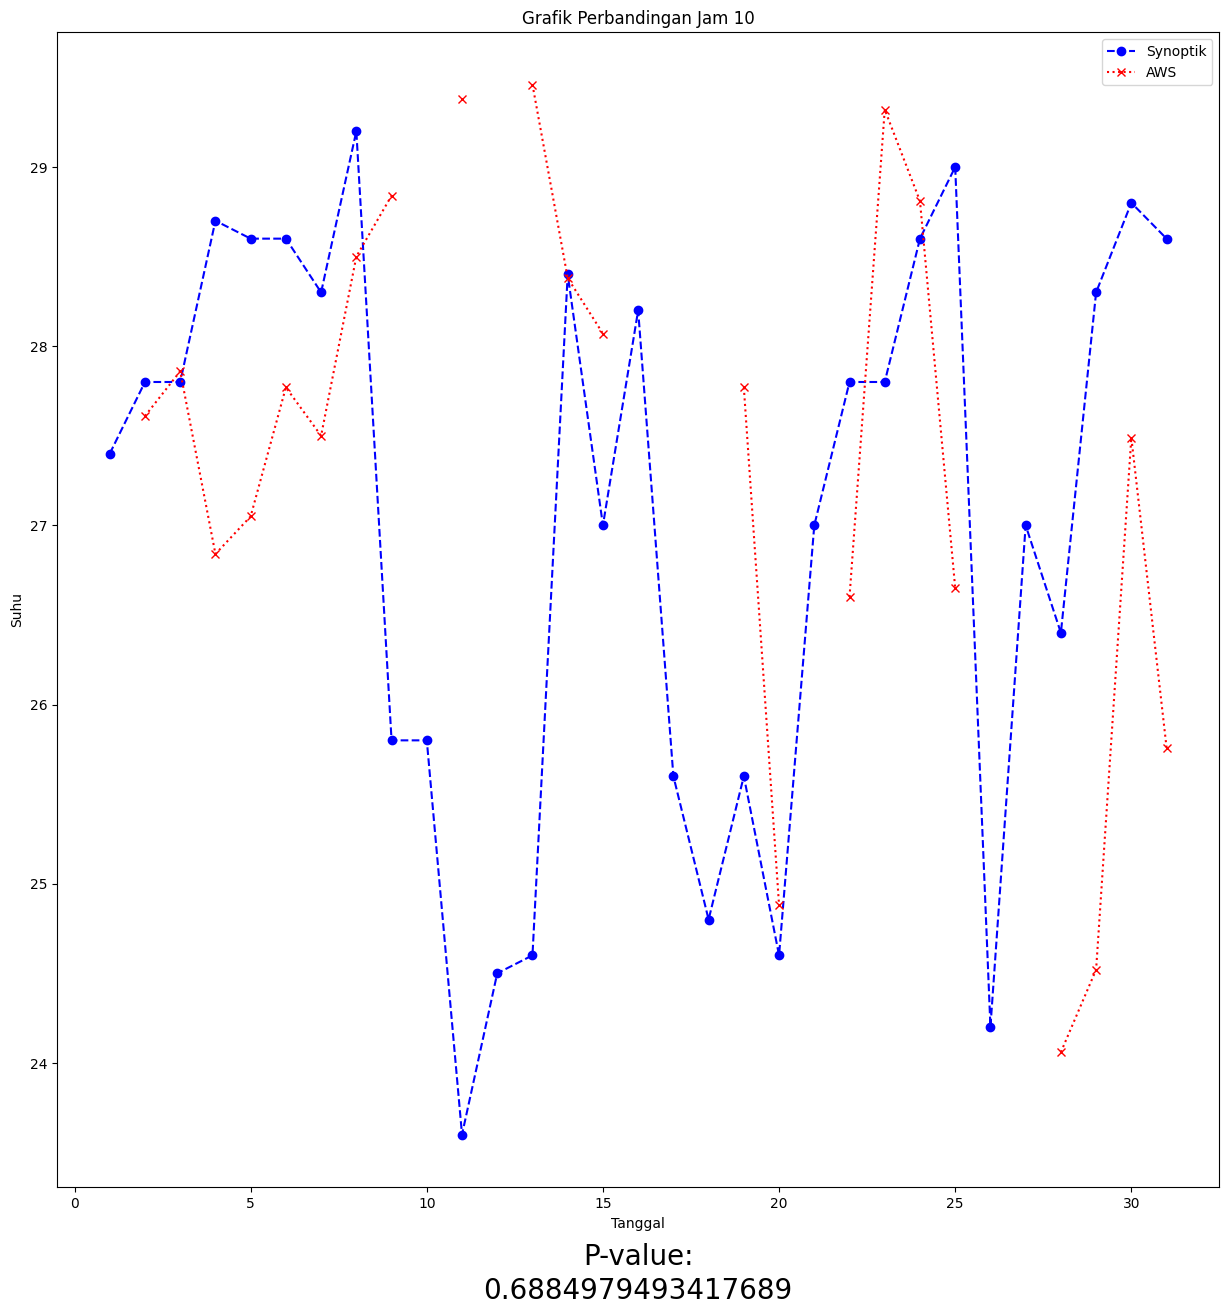

In [22]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('10:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['10']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='10', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['10'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('10')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['10']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='10', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['10'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('10')
    else:
      print("Dilakukan Uji T")
      ujiT('10')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('10')
    else:
      print("Dilakukan Uji T")
      ujiT('10')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 10')
plt.plot(df2_4['Tgl'], df2_4['10'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 11

Indeks baris yang berisi NaN:
Index([2, 3, 5, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 22, 23, 29], dtype='int64')
Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data
Data synoptik tidak berdistribusi Normal
Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U
Statistics=171.00, p=0.20
Tidak ada perbedaan yang siginifikan antara 2 sampel data
Grafik Perbandingannya:


C:\Users\MARIA\AppData\Local\Temp\ipykernel_20772\2559899101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_4['tt_air_avg'] = df_cleaned_4['tt_air_avg'].astype(float)


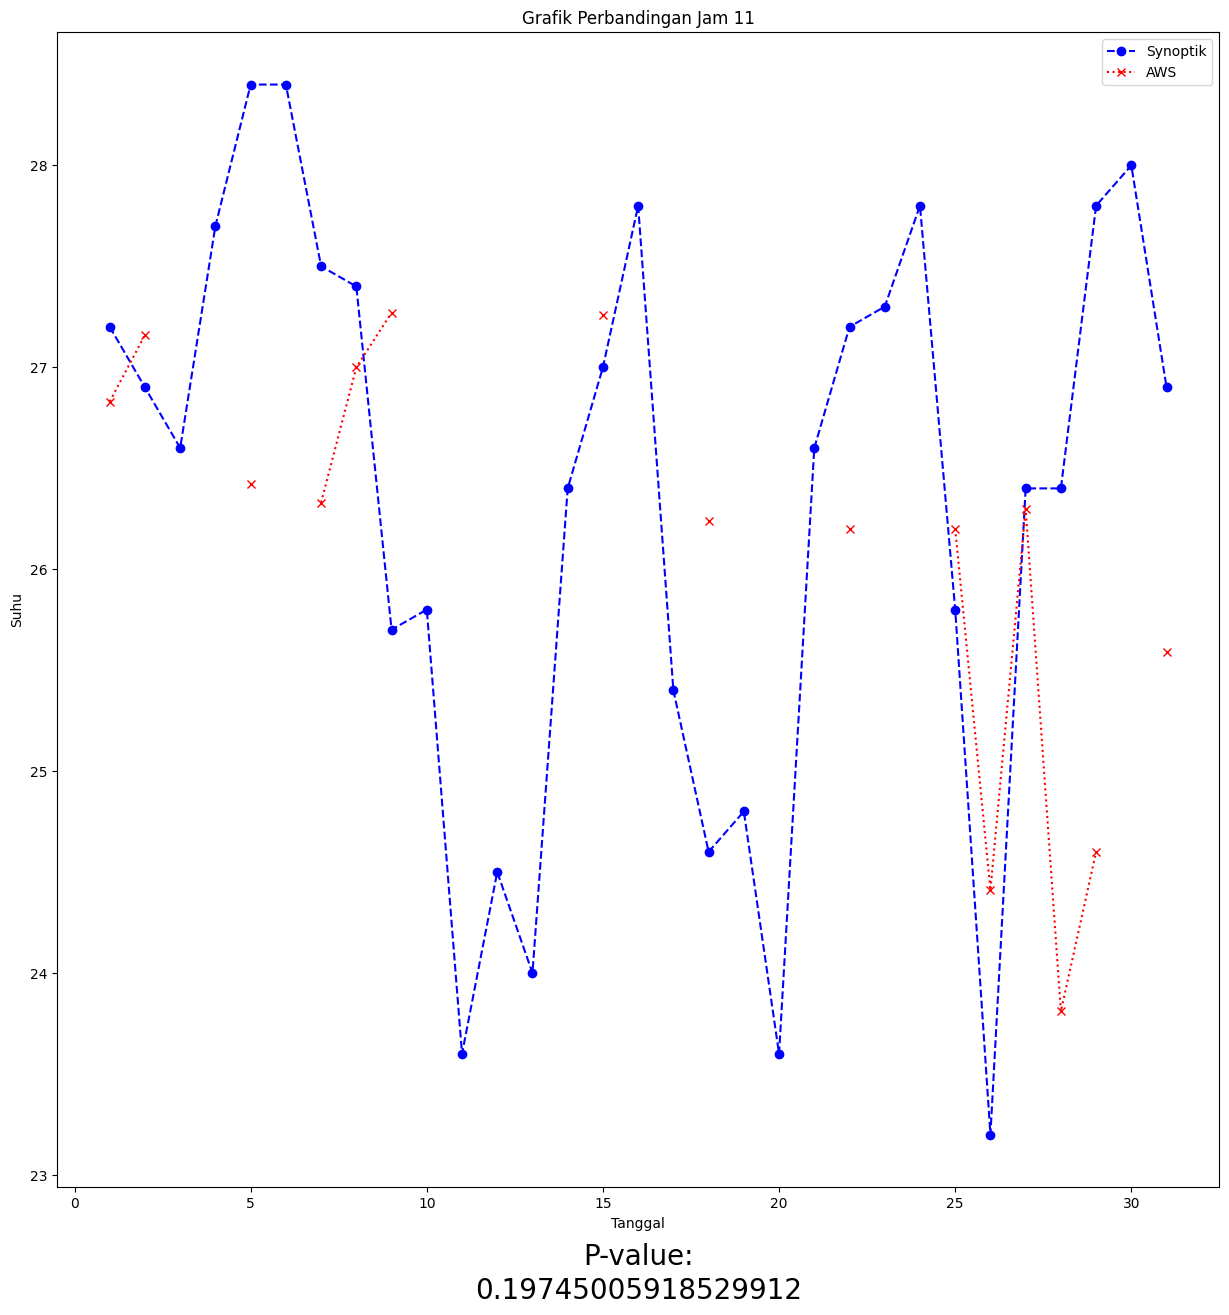

In [23]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('11:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['11']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='11', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['11'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('11')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['11']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='11', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['11'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('11')
    else:
      print("Dilakukan Uji T")
      ujiT('11')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('11')
    else:
      print("Dilakukan Uji T")
      ujiT('11')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 11')
plt.plot(df2_4['Tgl'], df2_4['11'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()

Jam 12

Indeks baris yang berisi NaN:
Index([1, 4, 9, 11, 12, 14, 16, 23, 26, 28, 29, 30], dtype='int64')
Kedua data Berdistribusi Normal maka dilakukan Uji t
t static: 1.0875215251135333
Critical value for t two tailed: 2.0017174830120923
Critical value for t one tailed: 1.671552762153672
p-value for two tailed: 0.28130513565594684
p-value for one tailed: 0.14065256782797342
Tidak ada perbedaan yang signifikan antara dua kelompok data
Grafik Perbandingannya:


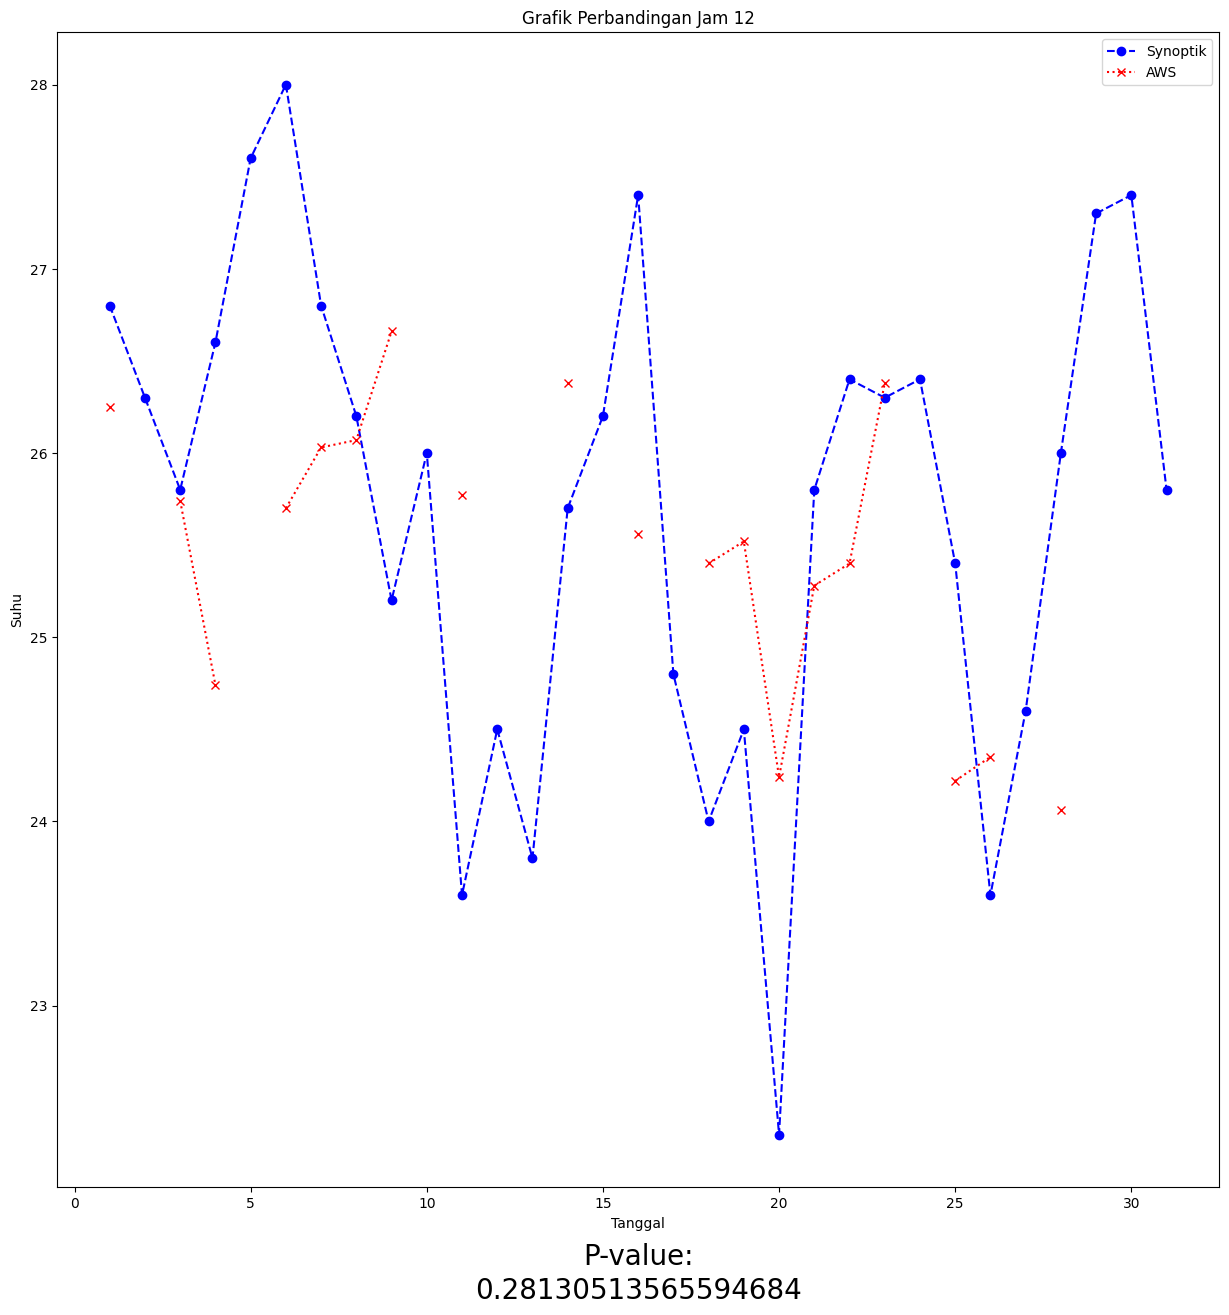

In [24]:
#Filter data AWS di Jam yang ditentukan
dft['Tanggal'] = pd.to_datetime(dft['Tanggal'])
midnight_filter = dft[dft['Tanggal'].dt.time == pd.to_datetime('12:00:00').time()]
df1_4 = midnight_filter['tt_air_avg']
Tgl = list(range(1, len(df1_4) + 1))
df1_4 = pd.DataFrame({'tt_air_avg': df1_4.values, 'Tgl': Tgl})

#Cek NaN
rows_with_nan4 = df1_4.isna().any(axis=1)
indeks_baris_dengan_nan4= df1_4.index[rows_with_nan4]
r4=indeks_baris_dengan_nan4.values.tolist()
nilai_baris14 = df1_4['Tgl'].loc[r4]
c4=nilai_baris14.values.tolist()
print("Indeks baris yang berisi NaN:")
print(indeks_baris_dengan_nan4)

#Hapus NaN
df_cleaned_4 = df1_4.dropna()

#Filter Data Synoptik di jam yang ditentukan
d2_4=df['12']
df2_4 = pd.DataFrame(d2_4)
df2_4['Tgl']=df['Tgl']

#Hapus tanggal synoptik yang di AWS adalah NaN
df2_4=df2_4.dropna(axis=1)
filter_hapus4 = df2_4.isin(c4).any(axis=1)
df_cleaned14 = df2_4.drop(df[filter_hapus4].index)

#Mengurutkan Data
df_sorted_4 = df_cleaned14.sort_values(by='12', ascending=True)
df_sorted1_4 = df_cleaned_4.sort_values(by='tt_air_avg', ascending=True)

#Uji distribusi Normal
#Synoptik
statistic4, p_value4 = stats.shapiro(df_sorted_4['12'])
#AWS
df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
if p_value4>=0.05 and p_value14 >= 0.05:
  print("Kedua data Berdistribusi Normal maka dilakukan Uji t")
  ujiT('12')
else:
  print("Ada data yang tidak berdistribusi Normal maka dilakukan normalisasi data")
  if p_value4<0.05:
    print("Data synoptik tidak berdistribusi Normal")

    #Normalisasi
    df_max_scaled = df_cleaned14['12']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned14['Tgl']
    #Mengurutkan data
    df_sorted_4 = df_max_scaled.sort_values(by='12', ascending=True)

    #Uji Distribusi Normal Synoptik
    statistic4, p_value4 = stats.shapiro(df_sorted_4['12'])
    if p_value4<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('12')
    else:
      print("Dilakukan Uji T")
      ujiT('12')
  else:
    print("Data AWS tidak berdistribusi Normal")
    #Normalisasi
    df_max_scaled = df_cleaned_4['tt_air_avg']
    for col in df_max_scaled:
        df_max_scaled= absolute_maximum_scale(df_max_scaled)
    df_max_scaled=pd.DataFrame(df_max_scaled)
    df_max_scaled['Tgl']=df_cleaned_4['Tgl']

    #Mengurutkan data
    df_sorted1_4 = df_max_scaled.sort_values(by='tt_air_avg', ascending=True)

    #Uji Distribusi Normal AWS
    df_sorted1_4['tt_air_avg'] = df_sorted1_4['tt_air_avg'].astype(float)
    statistic14, p_value14 = stats.shapiro(df_sorted1_4['tt_air_avg'])
    if p_value14<0.05:
      print("Data tetap tidak berdistribusi normal maka dilakukan uji Mann-Whitney U")
      mwu('12')
    else:
      print("Dilakukan Uji T")
      ujiT('12')

#Grafik
print("Grafik Perbandingannya:")
df2_4['Tgl']=df2_4['Tgl'].astype(int)
df1_4['tt_air_avg']=df1_4['tt_air_avg'].astype(float)
plt.figure(figsize=(15,15))
plt.title('Grafik Perbandingan Jam 12')
plt.plot(df2_4['Tgl'], df2_4['12'], label='Synoptik', color='blue', linestyle='dashed', marker='o')
plt.plot(df1_4['Tgl'], df1_4['tt_air_avg'], label='AWS', color='red', linestyle='dotted', marker='x')
plt.legend(loc='upper right')
plt.xlabel('Tanggal')
plt.ylabel('Suhu')
plt.text(0.5, -0.06,'P-value:', ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
if p_value4>=0.05 and p_value14 >= 0.05:
  plt.text(0.5, -0.09, p_two4, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
else:
  plt.text(0.5, -0.09, p_value, ha='center', va='center',fontsize=20, transform=plt.gca().transAxes)
plt.show()